# <span style="color:#228B22">Bobcats, Coyotes & Foxes</span>
This Jupyter Notebook is for a mid-term project that looks at the explored methods for cleaning & analyzing data in order to extract meaningful insights. The goal of this project is to analyze the data to evaluate whether specific morphological or biogeochemical traits can reliably differentiate species. We also research biological and ecological factors that may explain observed patterns.

<p align="center">
  <img src="new_fox.jpg" alt="Alt Text" width="300" style="border-radius: 15px;"/>
</p>

## <span style="color:#228B22">Part 2 | Data Preprocessing</span>
In part 2, we begin with data pre-processing, statistical and visualization techniques. We start off with data pre-processing, where we look at how we cleaned the dataset, handling the missing values, data type conversions and any trasnformations applied. We justify any decisions made about outlier treatment, such as removal, trasnformation or retention.

### <span style="color:#228B22">Loading the Dataset</span>
To begin the mid-term project, we start off by loading the `.csv` file into a Pandas Dataframe. This allows us to the see the statistics behind the dataset,the features in the dataset, as well as their respective data types. Loading it into a Pandas Dataframe also allows us to perform data cleaning feature, remove or add any features, as well as many other things.

In [1]:
# importing the pandas library
import pandas as pd

# importing the ipython library
from IPython.display import display

# converting the .csv file into a pandas data frame
scat_df = pd.read_csv(r'C:\GitHub\BobcatsCoyotesFoxes\data\Dataset_BobcatsCoyotesFoxes.csv')

# displaying the first 5 rows of the data frame
scat_df.head(5)

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat,Scrape
0,Coyote,January,2012,YOLA,Edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,Coyote,January,2012,YOLA,Edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,Bobcat,January,2012,YOLA,Middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,Coyote,January,2012,YOLA,Middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,Coyote,January,2012,YOLA,Edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0,0


### <span style="color:#228B22"> Dataset Explained </span>
Looking at this data set, we need to understand what the features are about. We need to know what the units are, what the features mean, as well as the description of the features. Here is a complete breakdown into the dataframe and what each of these features mean, as well as the necessary column renaming.

In [2]:
# displaying the pandas data frame
display("The Scat Data Frame: ", scat_df.head(5))

'The Scat Data Frame: '

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat,Scrape
0,Coyote,January,2012,YOLA,Edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,Coyote,January,2012,YOLA,Edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,Bobcat,January,2012,YOLA,Middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,Coyote,January,2012,YOLA,Middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,Coyote,January,2012,YOLA,Edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0,0


### <span style="color:#228B22"> Identifying the Scat </span>
The first following features of the data frame are information related to identifying the scat. As presented in the bullet points below, we look at the species the scat came from, the month and year the scat was dropped, as well as the site, and where on the trail the scat was dropped at. Although not neceesary, we rename the column headings for more clarity.
- <span style="color:green">**Species:**</span> the specied that produced the scat
- <span style="color:green">**Month:**</span> the month when the scat was collected
- <span style="color:green">**Year:**</span> the year when the scat was collected
- <span style="color:green">**Site:**</span> the location / site code where the scat was found
- <span style="color:green">**Location:**</span> the specific position of the scat on the trail or road

In [3]:
# renaming the columns for more clarity
scat_df.rename(columns={'Species' : 'scat_species', 'Month' : 'scat_month', 'Year' : 'scat_year', 'Site' : 'scat_site',
                       'Location' : 'scat_location'}, 
                       inplace=True)

# displaying the updated scat data frame
scat_df.head(5)

,scat_species,scat_month,scat_year,scat_site,scat_location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat,Scrape
0,Coyote,January,2012,YOLA,Edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,Coyote,January,2012,YOLA,Edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,Bobcat,January,2012,YOLA,Middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,Coyote,January,2012,YOLA,Middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,Coyote,January,2012,YOLA,Edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0,0


### <span style="color:#228B22"> Description of the Scat </span>
The second following features of the data frame are information related to the appearance of the scat. As presented in the bullet points below, we look at the age of the scat, how many pieces, the length and diameter of the scar, the taper and taper index, as well as the mass of the scat after free-drying.
- <span style="color:green">**Age:**</span> the age of the scat when it was collected
- <span style="color:green">**Number:**</span> the number of separate scat pieces in the sample
- <span style="color:green">**Length:**</span> the length of the longest scat piece (measured in cm)
- <span style="color:green">**Diameter:**</span> the widest diameter of the scat (measured in mm)
- <span style="color:green">**Taper:**</span> the length of the longest taper down the axis of the scat (measured in mm)
- <span style="color:green">**Taper Index (TI):**</span> ratio of the taper length to scat diameter 
- <span style="color:green">**Mass:**</span> the total dry weight of the scat after free-drying and baking (measured in grams)

In [4]:
# renaming the columns for more clarity
scat_df.rename(columns={'Age' : 'scat_age', 'Number' : 'scat_number', 'Length' : 'scat_length_cm', 'Diameter' : 'scat_diameter_mm', 
                        'Taper' : 'scat_taper_mm', 'TI' : 'scat_taper_index', 'Mass' : 'scat_mass_grams'}, 
                       inplace=True)

# displaying the updated scat data frame
scat_df.head(5)

,scat_species,scat_month,scat_year,scat_site,scat_location,scat_age,scat_number,scat_length_cm,scat_diameter_mm,scat_taper_mm,scat_taper_index,scat_mass_grams,d13C,d15N,CN,Ropey,Segmented,Flat,Scrape
0,Coyote,January,2012,YOLA,Edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,Coyote,January,2012,YOLA,Edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,Bobcat,January,2012,YOLA,Middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,Coyote,January,2012,YOLA,Middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,Coyote,January,2012,YOLA,Edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0,0


### <span style="color:#228B22"> Carbon & Nitrogen Information of the Scat </span>
The third following features of the data frames are related to the chemical composition of the scat. As presented in the bullet points below, we look at the amount of carbon and nitrogen in the scat, as well as the carbon-nitrogen ratio in the scat itself.
- <span style="color:green">**d13C:**</span> ratio of carbon-13 to carbon-12
- <span style="color:green">**d15C:**</span> ratio of nitrogen-15 to nitrogen-14
- <span style="color:green">**CN Ratio:**</span> ratio of carbon to nitrogen


In [5]:
# renaming the columns for more clarity
scat_df.rename(columns={'CN' : 'C:N Ratio'}, 
                       inplace=True)

# displaying the updated scat data frame
scat_df.head(5)

,scat_species,scat_month,scat_year,scat_site,scat_location,scat_age,scat_number,scat_length_cm,scat_diameter_mm,scat_taper_mm,scat_taper_index,scat_mass_grams,d13C,d15N,C:N Ratio,Ropey,Segmented,Flat,Scrape
0,Coyote,January,2012,YOLA,Edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,Coyote,January,2012,YOLA,Edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,Bobcat,January,2012,YOLA,Middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,Coyote,January,2012,YOLA,Middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,Coyote,January,2012,YOLA,Edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0,0


### <span style="color:#228B22"> Morphological Traits of the Scat </span>
The fourth and last following of the features of the data frames are related to the morphological traits of the scat. As presented in the bullet points below, we look at the shape of the scat, as to whether it is twisted, segmented, flat puddle or if there are any scrape marks.
- <span style="color:green">**Ropey:**</span> does the scat apppear twisted / woven? (1 means yes, 0 means no)
- <span style="color:green">**Segmented:**</span> does the scat show segmentation? (1 means yes, 0 means no)
- <span style="color:green">**Flat:**</span> is the scat a flat puddle lacking distinct shape? (1 means yes, 0 means no)
- <span style="color:green">**Scrape:**</span> is there a scrape mark near the scat? (1 means yes, 0 means no)

In [6]:
# renaming the columns for more clarity
scat_df.rename(columns={'Ropey' : 'scat_ropey', 'Segmented' : 'scat_segmented', 'Flat' : 'scat_flat', 'Scrape' : 'scat_scrape'}, 
                       inplace=True)

# displaying the updated scat data frame
scat_df.head(5)

,scat_species,scat_month,scat_year,scat_site,scat_location,scat_age,scat_number,scat_length_cm,scat_diameter_mm,scat_taper_mm,scat_taper_index,scat_mass_grams,d13C,d15N,C:N Ratio,scat_ropey,scat_segmented,scat_flat,scat_scrape
0,Coyote,January,2012,YOLA,Edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,Coyote,January,2012,YOLA,Edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,Bobcat,January,2012,YOLA,Middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,Coyote,January,2012,YOLA,Middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,Coyote,January,2012,YOLA,Edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0,0


### <span style="color:#228B22">Dataset Description & Information</span>
After we've renamed the columns in the dataframe, we now move on to looking at the statistical summary of the numerical columns in the data frame using 
`.describe()` and a quick overview of the data frame structure using `.info()`.

In [7]:
# viewing the statistical summary of the pandas data frame
display("Statistical Summary: ",  scat_df.describe())

# viewing the overview of the pandas data frame 
display("Data Frame Overview: ", scat_df.info())

'Statistical Summary: '

,scat_year,scat_age,scat_number,scat_length_cm,scat_diameter_mm,scat_taper_mm,scat_taper_index,scat_mass_grams,d13C,d15N,C:N Ratio,scat_ropey,scat_segmented,scat_flat,scat_scrape
count,110.000000,110.000000,110.000000,110.000000,104.000000,93.000000,93.000000,109.000000,108.000000,108.000000,108.000000,110.000000,110.000000,110.000000,110.000000
mean,2011.936364,3.345455,2.618182,9.298182,18.558654,27.433333,1.601505,12.455229,-26.860185,7.436481,8.398796,0.563636,0.563636,0.054545,0.045455
std,0.707461,1.370973,1.427012,3.437275,3.882013,15.055133,1.006111,8.848789,2.175552,3.016454,3.662250,0.498204,0.498204,0.228130,0.209252
min,2011.000000,1.000000,1.000000,2.500000,7.800000,2.300000,0.230000,0.940000,-29.850000,1.840000,4.500000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,3.000000,2.000000,6.500000,16.075000,17.300000,0.990000,5.660000,-28.082500,5.620000,6.200000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,3.000000,2.000000,9.000000,18.050000,25.800000,1.430000,9.750000,-27.470000,6.885000,7.250000,1.000000,1.000000,0.000000,0.000000
75%,2012.000000,5.000000,3.000000,11.500000,21.325000,37.400000,1.890000,17.610000,-26.445000,8.305000,8.650000,1.000000,1.000000,0.000000,0.000000
max,2013.000000,5.000000,7.000000,20.500000,30.000000,91.500000,8.680000,53.700000,-19.670000,18.000000,23.600000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   scat_species      110 non-null    object 
 1   scat_month        110 non-null    object 
 2   scat_year         110 non-null    int64  
 3   scat_site         110 non-null    object 
 4   scat_location     110 non-null    object 
 5   scat_age          110 non-null    int64  
 6   scat_number       110 non-null    int64  
 7   scat_length_cm    110 non-null    float64
 8   scat_diameter_mm  104 non-null    float64
 9   scat_taper_mm     93 non-null     float64
 10  scat_taper_index  93 non-null     float64
 11  scat_mass_grams   109 non-null    float64
 12  d13C              108 non-null    float64
 13  d15N              108 non-null    float64
 14  C:N Ratio         108 non-null    float64
 15  scat_ropey        110 non-null    int64  
 16  scat_segmented    110 non-null    int64  
 1

'Data Frame Overview: '

None

### <span style="color:#228B22">Feature Data Type Conversion</span>
After viewing the data types of the features in the data frame, it is evident to see that the data type of some of the features need to be changed. We can achieve this using `.astype()`. Some of the features that need this is as follows:
- For features that need to be categorized using `.astype('category')`, they are `scat_species`, `scat_month`, `scat_site` & `scat_location`
- For features that need to be boolean using `.astype('boolean')`, they are `scat_ropey`, `scat_segmented`, `scat_flat` & `scat_scrape`

In [8]:
# converting the following features into categorical features
scat_df['scat_species'] = scat_df['scat_species'].astype('category')
scat_df['scat_month'] = scat_df['scat_month'].astype('category')
scat_df['scat_site'] = scat_df['scat_site'].astype('category')
scat_df['scat_location'] = scat_df['scat_location'].astype('category')

# converting the following features into categorical features
scat_df['scat_ropey'] = scat_df['scat_ropey'].astype('category')
scat_df['scat_segmented'] = scat_df['scat_segmented'].astype('category')
scat_df['scat_flat'] = scat_df['scat_flat'].astype('category')
scat_df['scat_scrape'] = scat_df['scat_scrape'].astype('category')

# viewing the overview of the pandas data frame just to double check
display("Data Frame Overview: ", scat_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   scat_species      110 non-null    category
 1   scat_month        110 non-null    category
 2   scat_year         110 non-null    int64   
 3   scat_site         110 non-null    category
 4   scat_location     110 non-null    category
 5   scat_age          110 non-null    int64   
 6   scat_number       110 non-null    int64   
 7   scat_length_cm    110 non-null    float64 
 8   scat_diameter_mm  104 non-null    float64 
 9   scat_taper_mm     93 non-null     float64 
 10  scat_taper_index  93 non-null     float64 
 11  scat_mass_grams   109 non-null    float64 
 12  d13C              108 non-null    float64 
 13  d15N              108 non-null    float64 
 14  C:N Ratio         108 non-null    float64 
 15  scat_ropey        110 non-null    category
 16  scat_segmented    110 non-

'Data Frame Overview: '

None

### <span style="color:#228B22">To Impute or To Drop?</span>
Great! We've set the appropriate data types to the appropriate features. We can also see from the quick overview that there are some null values in the data frame. The null values come from the following features: `scat_diameter_mm`, `scat_taper_mm`, `scat_taper_index`, `scat_mass_grams`, `d13C`, `d15N` & `C:N Ratio`.

In [9]:
# checking for number of missing values in each feature
scat_df.isnull().sum()

scat_species         0
scat_month           0
scat_year            0
scat_site            0
scat_location        0
scat_age             0
scat_number          0
scat_length_cm       0
scat_diameter_mm     6
scat_taper_mm       17
scat_taper_index    17
scat_mass_grams      1
d13C                 2
d15N                 2
C:N Ratio            2
scat_ropey           0
scat_segmented       0
scat_flat            0
scat_scrape          0
dtype: int64

### <span style="color:#228B22">Kernel Density Estimation Plots</span>
Now that we can confirm which features have missing values, we can now question whether it would be a good decision to drop the rows that have missing values, or use imputation methods to fill in the missing values. Since we have a small dataset, it would be best to not drop the values, but rather than impute them. So, what would be the method of imputation? Since the features with missing values are all numerical, we can use either mean or median. We use the application for the following situations:

- <span style="color:green">**Mean:**</span> we use the mean for numerical columns that are normally distributed
- <span style="color:green">**Median:**</span> we use the median for numerical columns that are skewed and contain outliers

In order to figure out whether a feature is normally distributed or skewed, we need to use data visualization. For this situation, we can plot a kernel density estimation plot for each of the features by creating a function that does as such.

In [10]:
# importing the matplotlib library
import matplotlib.pyplot as plt

# importing the seaborn library
import seaborn as sns

# function for plotting a histogram
def plot_histograms(feature_list):

    # defining the rows and columns
    rows = 3
    columns = 3
    total_plots = len(feature_list)

    # creating a sub plot grid
    fig, axes = plt.subplots(rows, columns, figsize=(15, 12))

    # flattening the axes
    axes = axes.flatten()

    # using a for loop to loop through the features
    for i, feature_name in enumerate(feature_list):

        # plotting a histogram
        sns.histplot(scat_df[feature_name], kde=True, ax=axes[i])

        # defining the axes and title of the plot
        axes[i].set_title("Histogram of " + feature_name)
        axes[i].set_xlabel(feature_name)
        axes[i].set_ylabel("Frequency")

        # adding the caption for numbering of the figure 
        axes[i].annotate(f"Figure {i+1}", xy=(0.5, -0.25), xycoords='axes fraction', ha='center', fontsize=10)
    
    # removing any unused subplots
    for j in range(total_plots, rows * columns):
        fig.delaxes(axes[j])
    
    # saving the plot in a plot directory
    plt.savefig(r"C:\GitHub\BobcatsCoyotesFoxes\plots\kde_missing.png", dpi=300, bbox_inches="tight")


    # displaying the plots
    plt.tight_layout()
    plt.show()

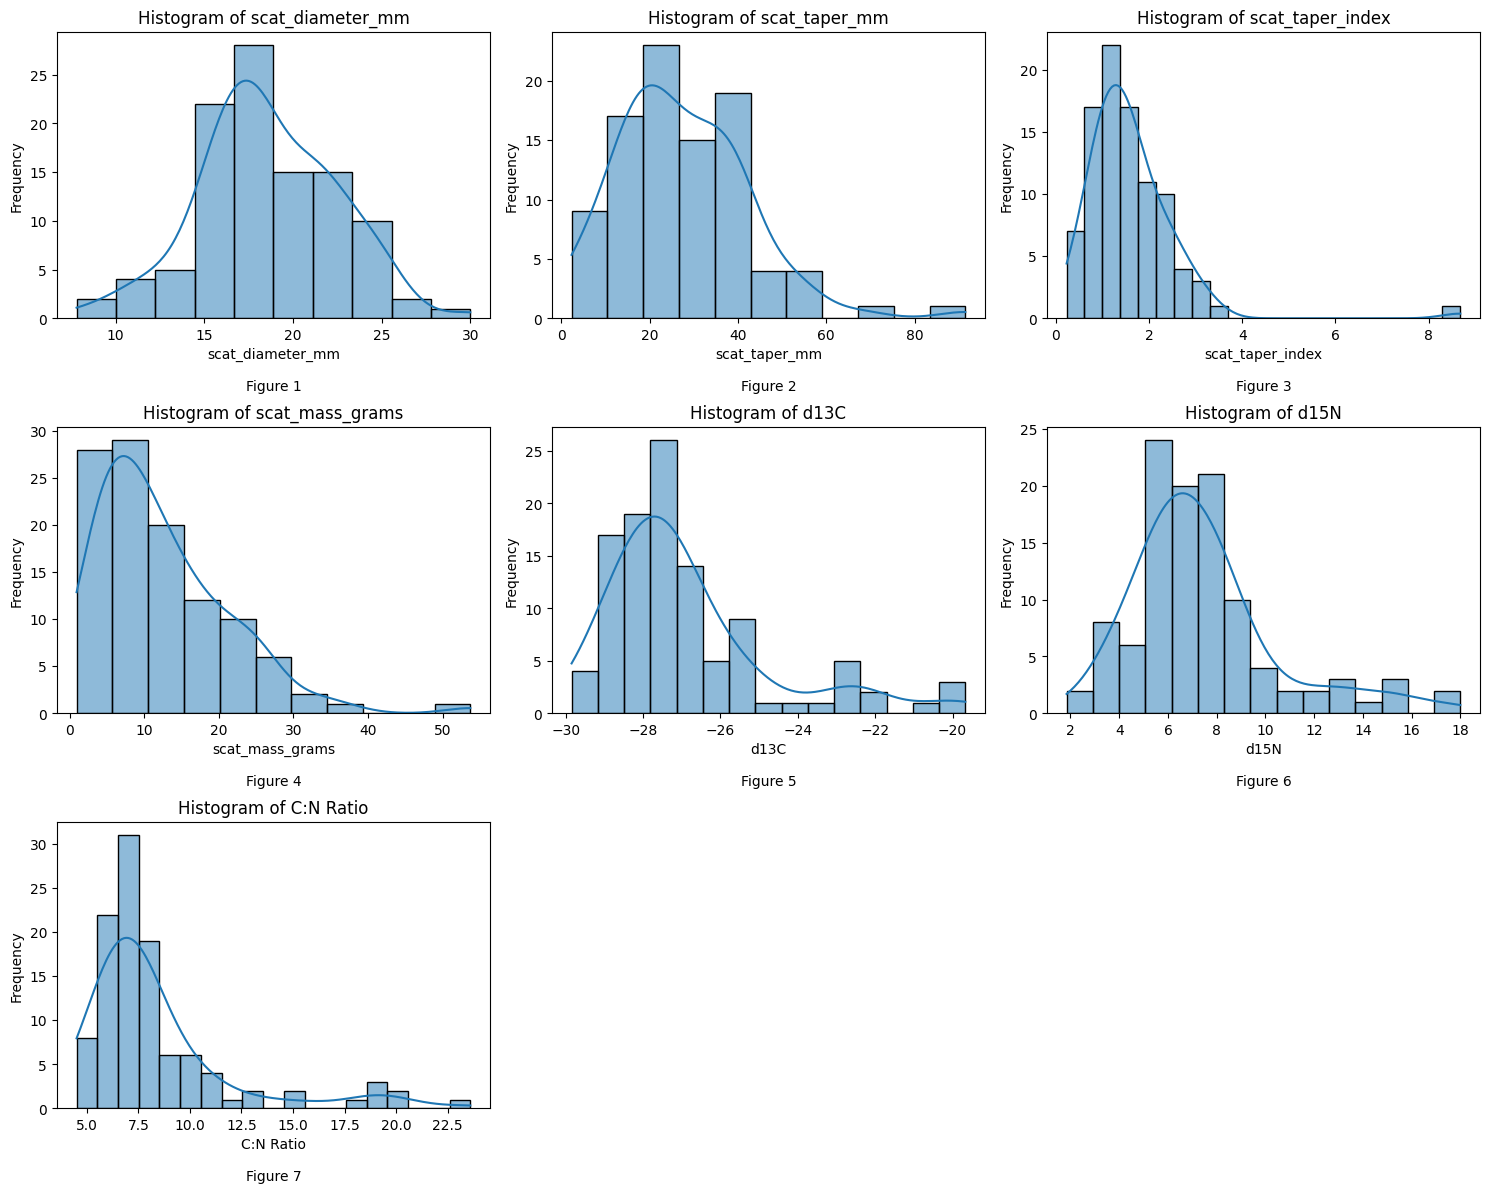

In [11]:
# creating a list of features to plot
missing_list = ['scat_diameter_mm', 'scat_taper_mm', 'scat_taper_index', 'scat_mass_grams', 'd13C', 'd15N', 'C:N Ratio']

# creating all the histogram plots using the function
plot_histograms(missing_list)

### <span style="color:#228B22">Box Plots</span>
Now that we've plotted the kernel density estimation plots, we can easily tell which features can be imputed using mean or mode. As the `scat_diameter_mm` is the only plot that has a normal distribution, we can impute the missing values with the mean of the feature. For the other features, we can see that they have a right-skew, as a result we can say that it such features can be imputed using the median. Just to be very sure, we will also graph out the box plots for the features that have missing values.

In [12]:
# function for plotting a box plot
def plot_box_plots(feature_list):

    # defining the rows and columns
    rows = 3
    columns = 3
    total_plots = len(feature_list)

    # creating a sub plot grid
    fig, axes = plt.subplots(rows, columns, figsize=(15, 12))

    # flattening the axes
    axes = axes.flatten()

    # using a for loop to loop through the features
    for i, feature_name in enumerate(feature_list):

        # plotting a histogram
        sns.boxplot(scat_df[feature_name], ax=axes[i])

        # defining the axes and title of the plot
        axes[i].set_title("Histogram of " + feature_name)
        axes[i].set_xlabel(feature_name)
        axes[i].set_ylabel("Frequency")

        # adding the caption for numbering of the figure 
        axes[i].annotate(f"Figure {i+8}", xy=(0.5, -0.25), xycoords='axes fraction', ha='center', fontsize=10)
    
    # removing any unused subplots
    for j in range(total_plots, rows * columns):
        fig.delaxes(axes[j])
    
    # saving the plot in a plot directory
    plt.savefig(r"C:\GitHub\BobcatsCoyotesFoxes\plots\box_plot_missing.png", dpi=300, bbox_inches="tight")


    # displaying the plots
    plt.tight_layout()
    plt.show()
    

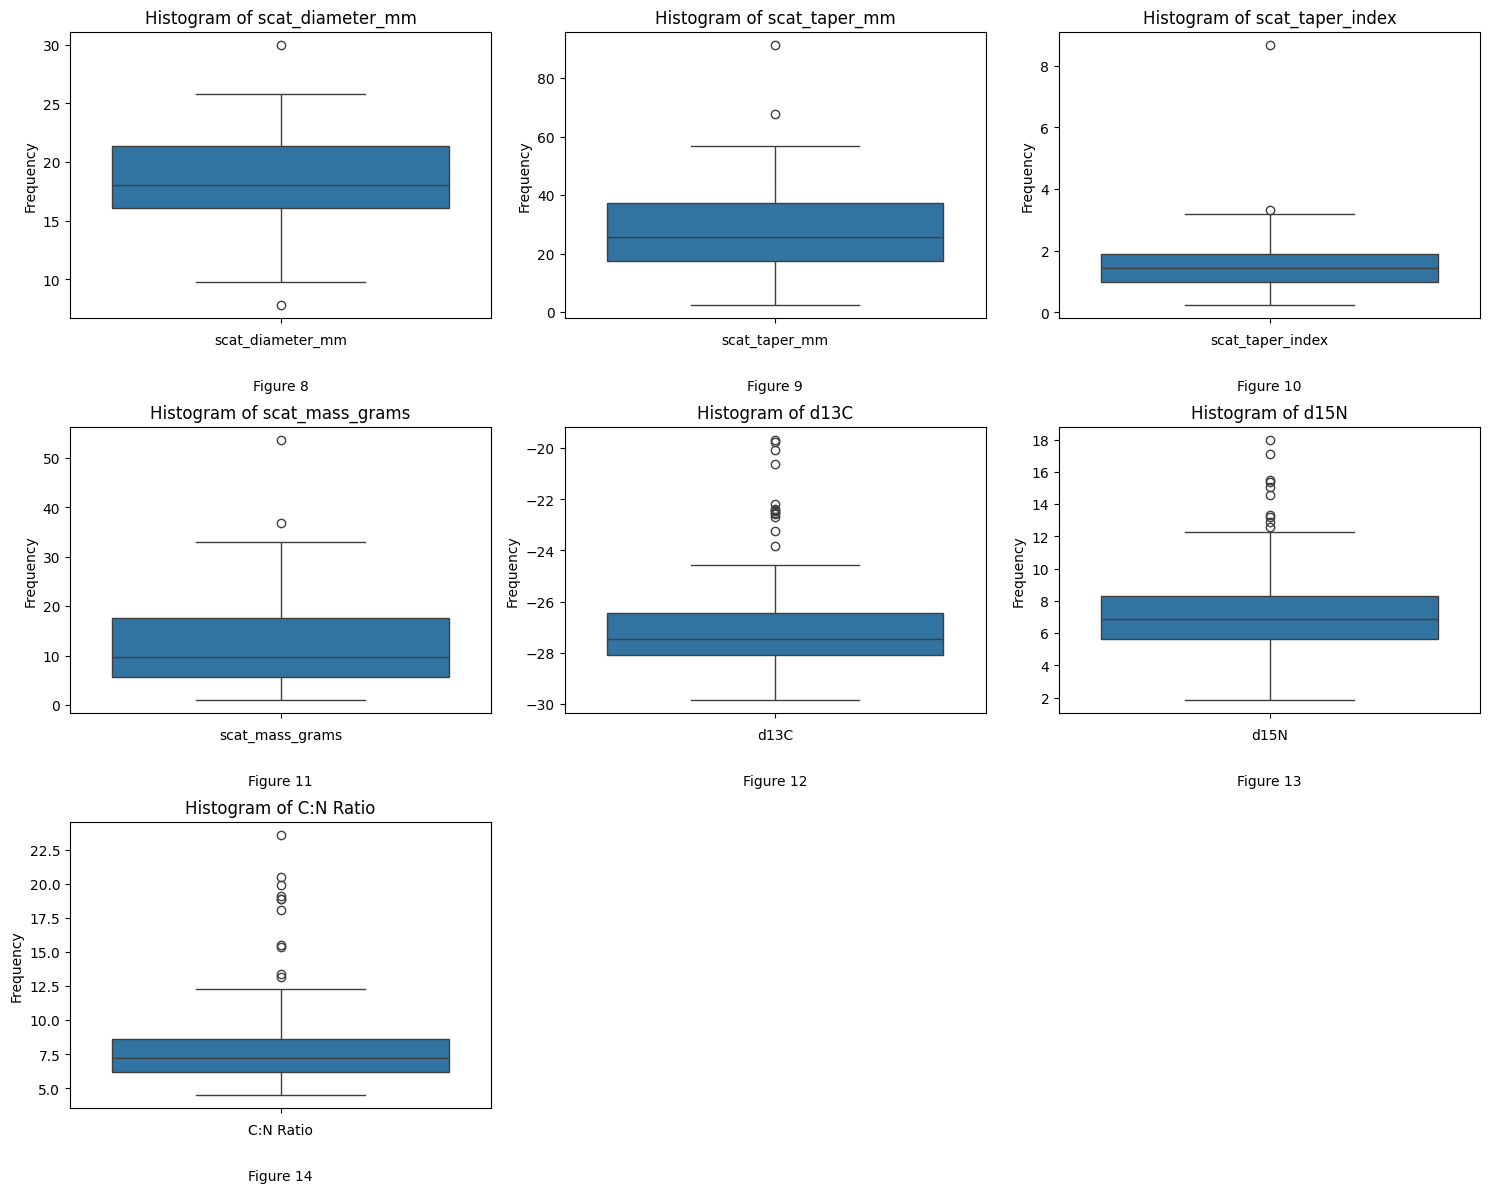

In [13]:
# creating all the histogram plots using the function
plot_box_plots(missing_list)

### <span style="color:#228B22">Performing the Imputations</span>
By looking at the boxplots, we can see that there are number of outliers in features such as `d13C`, `d15N`, `C:N Ratio`. However, we choose not the drop the rows that have the missing values as we have a small dataset. Instead it is better to simply impute with the median. As a result, we now perform the following imputations in the cell below.

In [14]:
# filling in the missing values using just the mode of that feature
scat_df['scat_diameter_mm'] = scat_df['scat_diameter_mm'].fillna(scat_df['scat_diameter_mm'].mean())

# list for perfoming median imputations
median_imputation = ['scat_taper_mm', 'scat_taper_index', 'scat_mass_grams', 'd13C', 'd15N', 'C:N Ratio']

# filling in the missing values using just the median of that feature
for median_feature in median_imputation:
    scat_df[median_feature] = scat_df[median_feature].fillna(scat_df[median_feature].median())

# checking to see that there are no missing values
display("Missing Values: ", scat_df.isnull().sum())

'Missing Values: '

scat_species        0
scat_month          0
scat_year           0
scat_site           0
scat_location       0
scat_age            0
scat_number         0
scat_length_cm      0
scat_diameter_mm    0
scat_taper_mm       0
scat_taper_index    0
scat_mass_grams     0
d13C                0
d15N                0
C:N Ratio           0
scat_ropey          0
scat_segmented      0
scat_flat           0
scat_scrape         0
dtype: int64

## <span style="color:#228B22">Part 2 | Visualization Techniques</span>
Next, we look at the different kinds of visualization techniques we've used to assess the differences between the species and the reasoning as to why we used those visualization techniques. In order to understand which visualization tehcniques to use, we need to talk about the reserach questions we're addressing:
- Which (if any) morphological and biogeochemical traits distinguish between orginating species of the scat samples
- Why do you think those traits differ across species

### <span style="color:#228B22">Setting a Response Variable</span>
In order to set a response variable, we need to understand the hypothesis question. The hypothesis question asks for any morophological and biogeochemical traits that distinguish between the originating species of the scat samples. 

Lets look at the morphological traits first. Morphological traits refers to the physical characteristics of the scat, and these are `scat_diameter_mm`, `scat_length_cm`, `scat_mass_grams`, `scat_taper_mm` & `scat_taper_index`. Next, we can look at the biogeochemical traits. Such biogeochemical traits are `d13C`, `d15N` & `C:N Ratio`. 

Now that we've defined the traits, we need to define the response variable. Since we're trying to distinguish the differences between the species, it would make the most sense to set the `scat_species` as the response variable. Since we're compare numerical variables against a categorical variable, it would make most sense to build a function that plots box plots and violin plots.


In [15]:
# function for plotting a box plot
def box_plot_visualize(response_variable, alternative_variable_list, row, col, dataframe, filename):

    # defining the rows and columns
    rows = row
    columns = col
    total_plots = len(alternative_variable_list)

    # creating a sub plot grid
    fig, axes = plt.subplots(rows, columns, figsize=(15, 15))

    # flattening the axes
    axes = axes.flatten()

    # using a for loop to loop through the features
    for i, feature_name in enumerate(alternative_variable_list):

        # plotting a box plot
        sns.boxplot(x=response_variable, y=feature_name, data=dataframe, ax=axes[i])

        # setting up the details of the plot
        axes[i].set_title(f"{feature_name} vs {response_variable.name}")
        axes[i].set_xlabel(response_variable.name)
        axes[i].set_ylabel(feature_name)

        # adding the caption for numbering of the figure 
        axes[i].annotate(f"Figure {i+15}", xy=(0.5, -0.25), xycoords='axes fraction', ha='center', fontsize=10)
    
    # removing any unused subplots
    for j in range(total_plots, rows * columns):
        fig.delaxes(axes[j])


    # saving the plot in a plot directory
    plt.savefig(rf"C:\GitHub\BobcatsCoyotesFoxes\plots\box_plot_{filename}.png", dpi=300, bbox_inches="tight")

    # displaying the plots
    plt.tight_layout()
    plt.show()

In [16]:
# function for plotting a violin plot
def violin_plot_visualize(response_variable, alternative_variable_list, row, col, dataframe, filename):

    # defining the rows and columns
    rows = row
    columns = col
    total_plots = len(alternative_variable_list)

    # creating a sub plot grid
    fig, axes = plt.subplots(rows, columns, figsize=(18, 10))

    # flattening the axes
    axes = axes.flatten()

    # using a for loop to loop through the features
    for i, feature_name in enumerate(alternative_variable_list):

        # plotting a box plot
        sns.violinplot(x=response_variable, y=feature_name, data=dataframe, ax=axes[i])

        # setting up the details of the plot
        axes[i].set_title(f"{feature_name} vs {response_variable.name}")
        axes[i].set_xlabel(response_variable.name)
        axes[i].set_ylabel(feature_name)

        # adding the caption for numbering of the figure 
        axes[i].annotate(f"Figure {i+20}", xy=(0.5, -0.25), xycoords='axes fraction', ha='center', fontsize=10)
    
    # removing any unused subplots
    for j in range(total_plots, rows * columns):
        fig.delaxes(axes[j])


    # saving the plot in a plot directory
    plt.savefig(rf"C:\GitHub\BobcatsCoyotesFoxes\plots\violin_plot_{filename}.png", dpi=300, bbox_inches="tight")

    # displaying the plots
    plt.tight_layout()
    plt.show()

### <span style="color:#228B22">Morphological Traits vs `scat_species`</span>
When we compare morphological traits, which are numerical variables against `scat_species`, which is a categorical variable, it would make the most sense to plot a box plot. We can use these box plots to draw comparisions between the morphological variables against the `scat_species`.

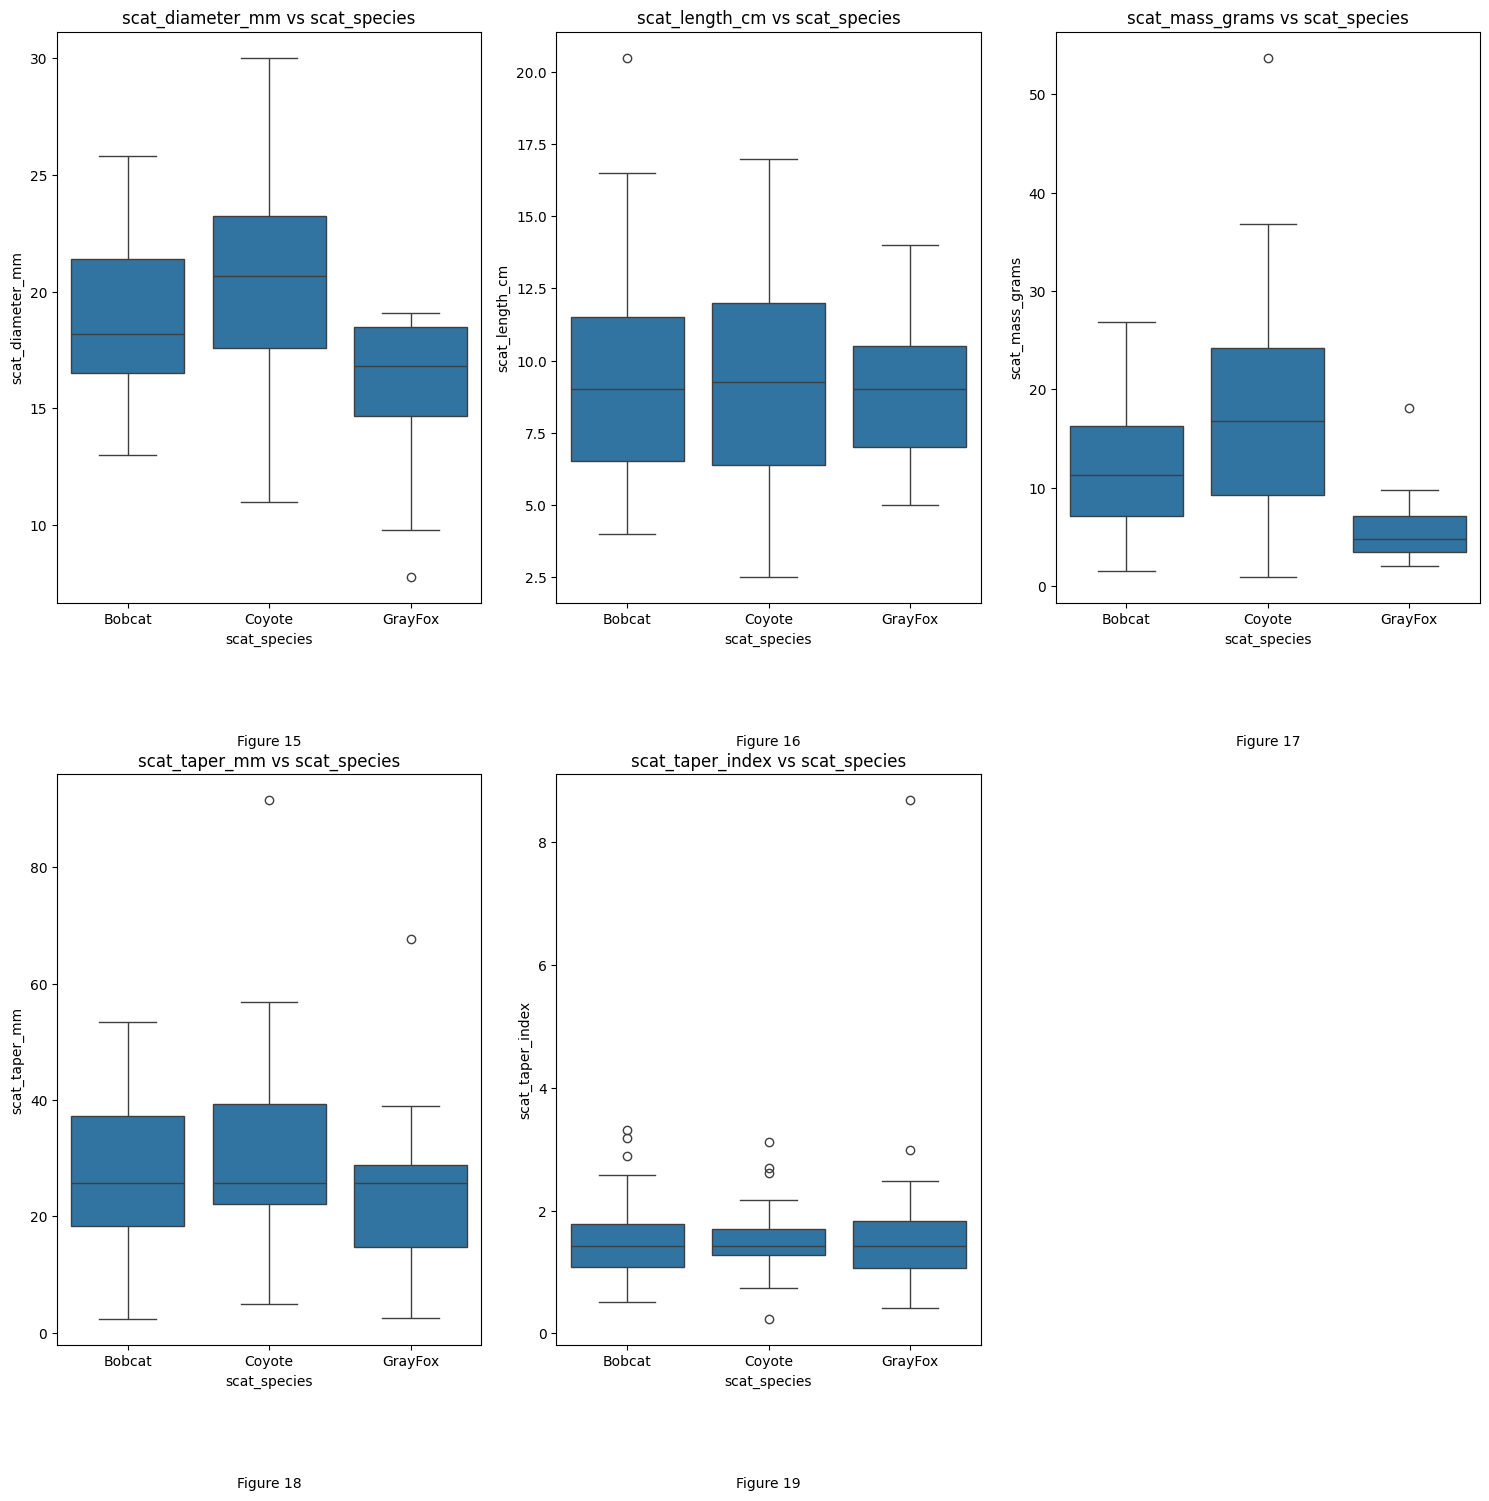

In [17]:
# setting up a list of morphological traits
morophological_list_one = ['scat_diameter_mm', 'scat_length_cm', 'scat_mass_grams', 'scat_taper_mm', 'scat_taper_index']

# creating the plots for comparing the morpohological traits against the response variable
box_plot_visualize(scat_df["scat_species"], morophological_list_one, 2, 3, scat_df, "morphological_one")

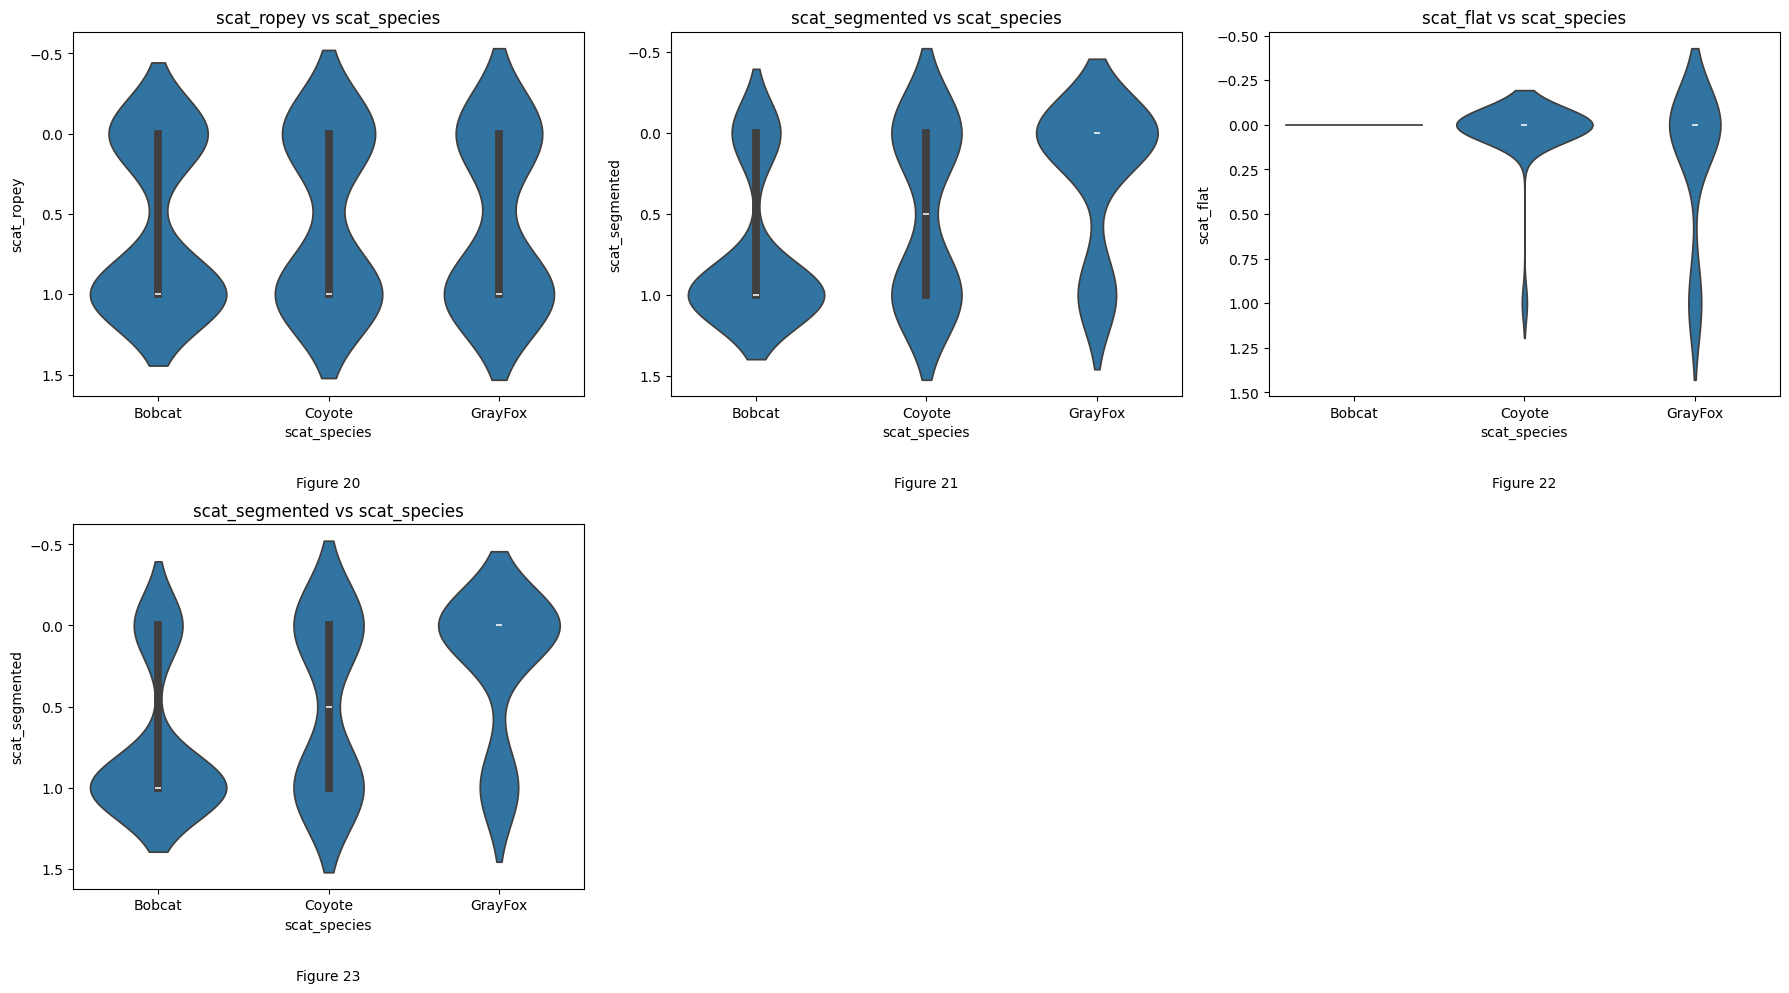

In [18]:
# setting up a second list of morphological traits
morophological_list_two = ['scat_ropey', 'scat_segmented','scat_flat', 'scat_segmented']

# creating the violin plots for comparing the morphological traits against the response variable
violin_plot_visualize(scat_df["scat_species"], morophological_list_two, 2, 3, scat_df, "morphological_two")

### <span style="color:#228B22">Biogeochemical Traits vs `scat_species`</span>
When we compare morphological traits, which are numerical variables against `scat_species`, which is a categorical variable, it would make the most sense to plot a violin plot. We can use these violin plots to draw comparisions between the biogeochemical variables against the `scat_species`.

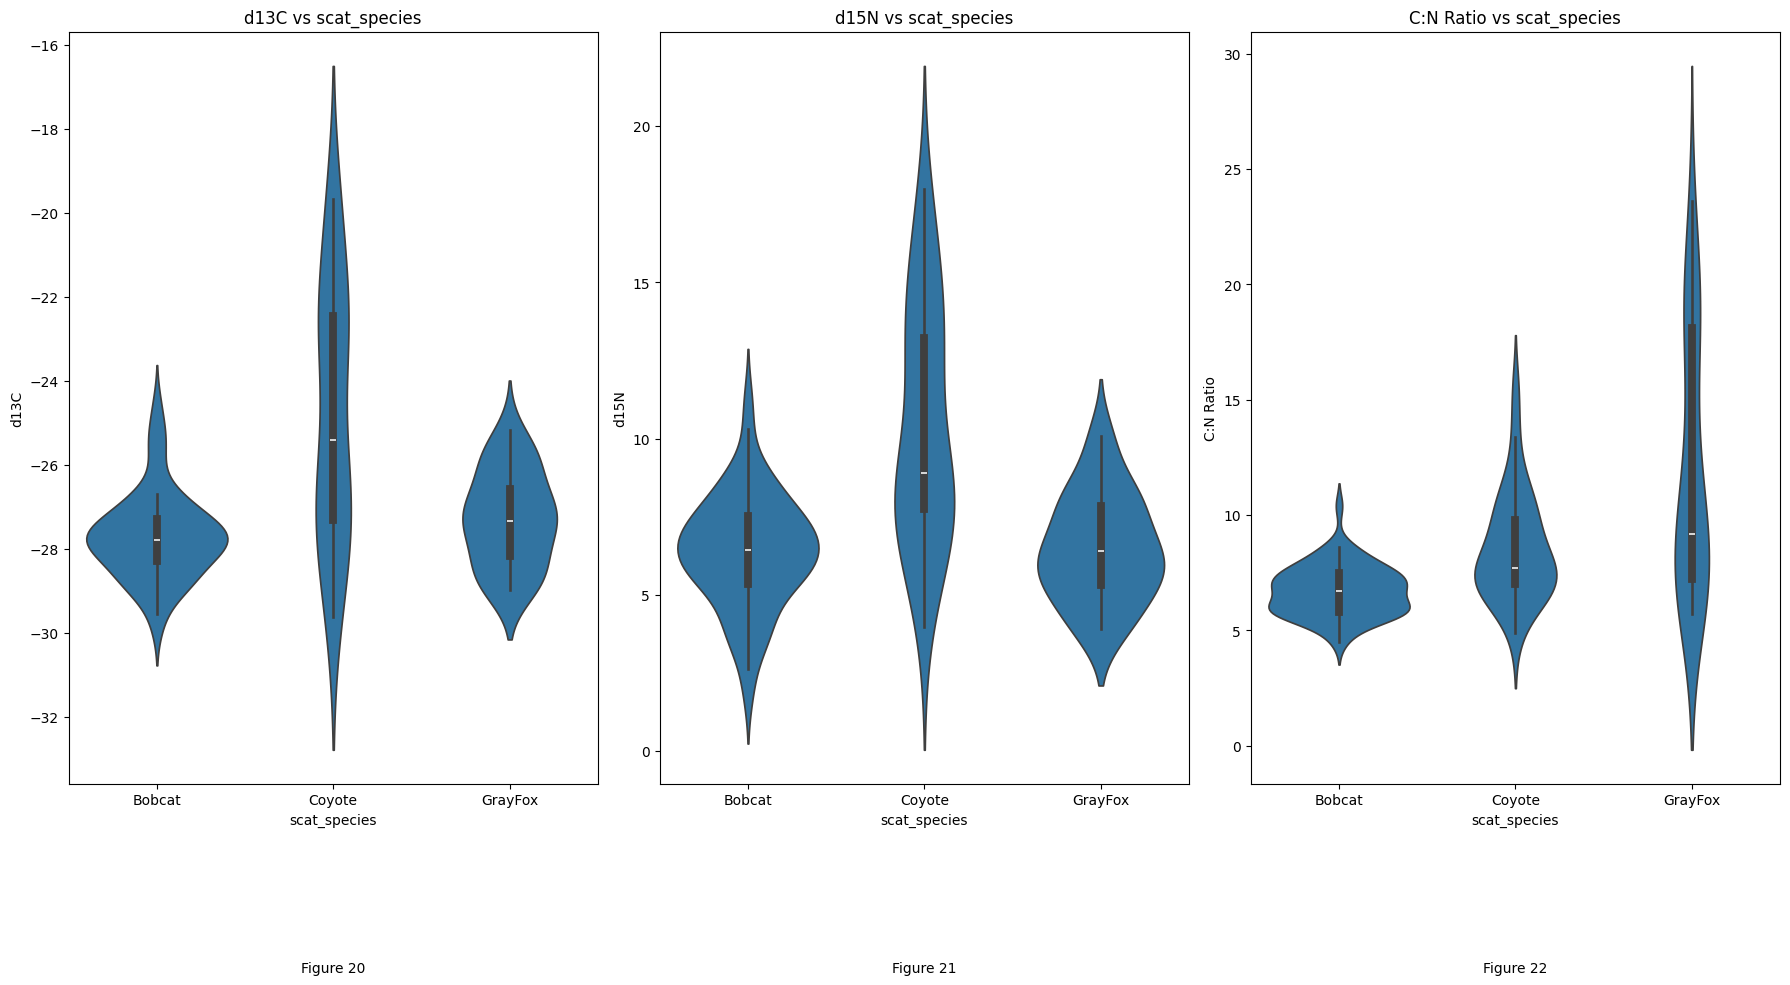

In [19]:
# setting up a list of biogeochemical traits
biogeochemical_list = ['d13C', 'd15N', 'C:N Ratio']

# creating the plots for comparing the biogeochemical traits against the response variable
violin_plot_visualize(scat_df["scat_species"], biogeochemical_list, 1, 3, scat_df, "biogeochemical")

## <span style="color:#228B22">Part 2 | Statistical Techniques</span>
Next, we look at the different kinds of statistical techniques we've used to assess the differences between the species and the reasoning as to why we used those statistical techniques. In order to understand which statistical tehcniques to use, we need to talk about the reserach questions we're addressing:
- Which (if any) morphological and biogeochemical traits distinguish between orginating species of the scat samples
- Why do you think those traits differ across species

### <span style="color:#228B22">The Kruskal-Wallis Test for Morphological Features</span>
In order to choose a statistical test, we need to understand the type of variables we're dealing with. Given that we're using `scat_species` as a variable with more than two values, and some of the morphological traits are numerical, it would make the most sense to use the Kruskal-Wallis test.

In [20]:
# importing the kruskal library
from scipy.stats import kruskal

# instantiating the lists to store the results
statistic_kw_list = []
probability_kw_list = []
signifigance_kw_list = []

# setting up the alpha value
alpha = 0.05
bonferroni_alpha = alpha / len(morophological_list_one)

# for looping through features in morphological list
for morphological_feature in morophological_list_one:

    # defining the groups
    group_one = scat_df[scat_df['scat_species'] == 'Bobcat'][morphological_feature]
    group_two = scat_df[scat_df['scat_species'] == 'Coyote'][morphological_feature]
    group_three = scat_df[scat_df['scat_species'] == 'GrayFox'][morphological_feature]

    # performing the kruskal wallis test
    statistic, probability = kruskal(group_one, group_two, group_three)

    # appending the results to the list
    statistic_kw_list.append(statistic)
    probability_kw_list.append(probability)

    # checking for the statistical signifigance
    signifigance_kw_list.append(probability < bonferroni_alpha)

# building a dictionary to display the results
morphological_dict = {
    'Variable Name' : morophological_list_one,
    'Test Statistic ' : statistic_kw_list,
    'Probability Value' : probability_kw_list,
    'Test Signifigance' : signifigance_kw_list
}

# converting the dictionary into a pandas data frame
morphological_df = pd.DataFrame(morphological_dict)

#  displaying the data frame
display(morphological_df)


,Variable Name,Test Statistic,Probability Value,Test Signifigance
0,scat_diameter_mm,17.434259,1.637566e-04,True
1,scat_length_cm,0.170969,9.180672e-01,False
2,scat_mass_grams,30.472310,2.415583e-07,True
3,scat_taper_mm,3.939293,1.395062e-01,False
4,scat_taper_index,0.066857,9.671242e-01,False


### <span style="color:#228B22"> Identifying Which Morphological Features Differ in Kruskal Wallis</span>
After performing the Kruskal-Wallis tests, we need to identify which features defined by the caategorical variable differs from at-least one other. In order to accomplish this, we can use Dunn tests to identify this. 

In [ ]:
# importing the posthoc library
import scikit_posthocs as sp

# importing the warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# instantiating the lists to store the results
statistic_kw_list = []
probability_kw_list = []
signifigance_kw_list = []

# setting up the alpha value
alpha = 0.05
bonferroni_alpha = alpha / len(morophological_list_one)

# for looping through features in morphological list
for morphological_feature in morophological_list_one:

    # defining the groups
    group_one = scat_df[scat_df['scat_species'] == 'Bobcat'][morphological_feature]
    group_two = scat_df[scat_df['scat_species'] == 'Coyote'][morphological_feature]
    group_three = scat_df[scat_df['scat_species'] == 'GrayFox'][morphological_feature]

    # performing the kruskal wallis test
    statistic, probability = kruskal(group_one, group_two, group_three)

    # checking for signifigance
    if probability < bonferroni_alpha:

        # performing dunn's test
        dunn_test = sp.posthoc_dunn(scat_df, val_col=morphological_feature, group_col='scat_species')
    
    # displaying the result as a table
    table = dunn_test.style.set_caption(f"Dunn's Test with {morphological_feature} (p-values)").format(
        precision=3).set_properties(**{'text-align': 'center'})
    
    display(table)


,Bobcat,Coyote,GrayFox
Bobcat,1.000,0.208,0.001
Coyote,0.208,1.000,0.000
GrayFox,0.001,0.000,1.000


,Bobcat,Coyote,GrayFox
Bobcat,1.000,0.208,0.001
Coyote,0.208,1.000,0.000
GrayFox,0.001,0.000,1.000


,Bobcat,Coyote,GrayFox
Bobcat,1.000,0.078,0.000
Coyote,0.078,1.000,0.000
GrayFox,0.000,0.000,1.000


,Bobcat,Coyote,GrayFox
Bobcat,1.000,0.078,0.000
Coyote,0.078,1.000,0.000
GrayFox,0.000,0.000,1.000


,Bobcat,Coyote,GrayFox
Bobcat,1.000,0.078,0.000
Coyote,0.078,1.000,0.000
GrayFox,0.000,0.000,1.000


### <span style="color:#228B22">The Chi-Squared Test for Morphological Features</span>
In order to choose a statistical test, we need to understand the type of variables we're dealing with. Given that we're using `scat_species` as a variable with more than two values, and some of the morphological traits are categorical, it would make the most sense to use the Chi-Squared test.

In [22]:
# importing the necessary libraries for chi-squared
from scipy.stats import chi2_contingency

# instantiating the lists to store the results
statistic_chi_list = []
probability_chi_list = []
signifigance_chi_list = []

# setting up the alpha value
alpha = 0.05
bonferroni_alpha = alpha / len(morophological_list_two)

# for looping through the morphological features
for feature in morophological_list_two:

    # creating a cross tab table
    table = pd.crosstab(scat_df['scat_species'], scat_df[feature])

    # performing the chi-squred test
    chi_2, probability, _, _ = chi2_contingency(table)

    # appending the results to the lists
    statistic_chi_list.append(chi_2)
    probability_chi_list.append(probability)
    
    # checking for the statistical signifigance
    signifigance_chi_list.append(probability < bonferroni_alpha)

# building a dictionary to display the results
chi_dict = {
    'Variable Name' : morophological_list_two,
    'Test Statistic ' : statistic_chi_list,
    'Probability Value' : probability_chi_list,
    'Test Signifigance' : signifigance_chi_list
}

# converting the dictionary into a data frame
chi_df = pd.DataFrame(chi_dict)

# displaying the table
display(chi_df)

,Variable Name,Test Statistic,Probability Value,Test Signifigance
0,scat_ropey,0.144431,0.93033,False
1,scat_segmented,18.060201,0.00012,True
2,scat_flat,13.737408,0.00104,True
3,scat_segmented,18.060201,0.00012,True


### <span style="color:#228B22">The Kruskal-Wallis Test for Biogeochemical Traits</span>
In order to choose a statistical test, we need to understand the types of variables we're dealing with. Given that we're using `scat_species` as a variable with more than two values, and as all the biogeochemical traits are all numerical, this would mean it makes the most sense to use Kruskal-Wallis.

In [23]:
# instantiating the lists to store the results
statistic_biogeo_kw_list = []
probability_biogeo_kw_list = []
signifigance_biogeo_kw_list = []

# setting up the alpha value
alpha = 0.05
bonferroni_alpha = alpha / len(biogeochemical_list)

# for looping through features in morphological list
for biogeochemical_feature in biogeochemical_list:

    # defining the groups
    group_one = scat_df[scat_df['scat_species'] == 'Bobcat'][biogeochemical_feature]
    group_two = scat_df[scat_df['scat_species'] == 'Coyote'][biogeochemical_feature]
    group_three = scat_df[scat_df['scat_species'] == 'GrayFox'][biogeochemical_feature]

    # performing the kruskal wallis test
    statistic, probability = kruskal(group_one, group_two, group_three)

    # appending the results to the list
    statistic_biogeo_kw_list.append(statistic)
    probability_biogeo_kw_list.append(probability)

    # checking for the statistical signifigance
    signifigance_biogeo_kw_list.append(probability < bonferroni_alpha)

# building a dictionary to display the results
biogeo_dict = {
    'Variable Name' : biogeochemical_list,
    'Test Statistic ' : statistic_biogeo_kw_list,
    'Probability Value' : probability_biogeo_kw_list,
    'Test Signifigance' : signifigance_biogeo_kw_list
}

# converting the dictionary into a pandas data frame
biogeo_df = pd.DataFrame(biogeo_dict)

#  displaying the data frame
display(biogeo_df)

,Variable Name,Test Statistic,Probability Value,Test Signifigance
0,d13C,20.428586,3.664282e-05,True
1,d15N,26.171212,2.074883e-06,True
2,C:N Ratio,31.953687,1.151715e-07,True


### <span style="color:#228B22"> Identifying Which Biogeochemical Features Differ in Kruskal Wallis</span>
After performing the Kruskal-Wallis tests, we need to identify which features defined by the categorical variable differs from at-least one other. In order to accomplish this, we can use Dunn tests to identify this. 

In [26]:
# importing the posthoc library
import scikit_posthocs as sp

# importing the warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# instantiating the lists to store the results
statistic_kw_list = []
probability_kw_list = []
signifigance_kw_list = []

# setting up the alpha value
alpha = 0.05
bonferroni_alpha = alpha / len(biogeochemical_list)

# for looping through features in morphological list
for morphological_feature in biogeochemical_list:

    # defining the groups
    group_one = scat_df[scat_df['scat_species'] == 'Bobcat'][morphological_feature]
    group_two = scat_df[scat_df['scat_species'] == 'Coyote'][morphological_feature]
    group_three = scat_df[scat_df['scat_species'] == 'GrayFox'][morphological_feature]

    # performing the kruskal wallis test
    statistic, probability = kruskal(group_one, group_two, group_three)

    # checking for signifigance
    if probability < bonferroni_alpha:

        # performing dunn's test
        dunn_test = sp.posthoc_dunn(scat_df, val_col=morphological_feature, group_col='scat_species')
    
    # displaying the result as a table
    table = dunn_test.style.set_caption(f"Dunn's Test with {morphological_feature} (p-values)").format(
        precision=3).set_properties(**{'text-align': 'center'})
    
    display(table)


,Bobcat,Coyote,GrayFox
Bobcat,1.000,0.000,0.160
Coyote,0.000,1.000,0.010
GrayFox,0.160,0.010,1.000


,Bobcat,Coyote,GrayFox
Bobcat,1.000,0.000,0.989
Coyote,0.000,1.000,0.000
GrayFox,0.989,0.000,1.000


,Bobcat,Coyote,GrayFox
Bobcat,1.000,0.000,0.000
Coyote,0.000,1.000,0.182
GrayFox,0.000,0.182,1.000
